In [1]:
#Import Dependencies

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

In [2]:
# Import Housing Prices Tables

prices_df = pd.read_excel('C:/Users/Rahul/OneDrive/Desktop/Projects/Toronto_House_Prices/Data/House_Prices_Data.xlsx', 
                    sheet_name = 'Avg_Price', index_col = 'Month', parse_dates = True)
houses_absorbed = pd.read_excel('C:/Users/Rahul/OneDrive/Desktop/Projects/Toronto_House_Prices/Data/House_Prices_Data.xlsx', 
                    sheet_name = 'Units_Absorbed')
prices_df

,Agincourt/Malvern,Ajax/Pickering,Alderwood,Aurora,Banbury-Don Mills/York Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles/Hillcrest Village,Bedford Park-Nortown,...,Willowdale West/Newtonbrook West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor/Greenwood-Coxwell,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St. Clair,Yorkdale-Glen Park,Toronto
Month,,,,,,,,,,,,,,,,,,,,,
2019-01-01,**,**,**,1775753,**,**,**,**,**,2875000,...,**,**,**,**,**,**,**,**,**,1219504
2019-02-01,**,**,1269000,1412073,**,**,**,**,**,**,...,**,**,**,**,**,**,**,**,**,1234569
2019-03-01,**,652908,**,2053441,**,**,**,**,**,**,...,**,**,**,**,**,**,**,**,**,1140886
2019-04-01,**,**,**,1954545,**,**,**,**,**,**,...,**,**,**,**,**,**,**,**,**,1143047
2019-05-01,**,831152,1925000,1639283,**,**,**,**,**,**,...,**,**,**,**,**,**,**,**,**,1226208
2019-06-01,**,**,**,**,**,**,**,**,**,**,...,2220000,**,**,**,**,**,**,**,**,1380491
2019-07-01,**,**,**,**,**,**,**,**,**,**,...,2500000,**,**,**,**,**,**,**,**,1301496
2019-08-01,**,709347,**,**,**,**,**,**,**,2514286,...,2388333,**,**,**,**,**,**,**,**,1258793
2019-09-01,**,954653,**,**,**,**,**,**,**,**,...,**,**,**,**,**,**,**,**,**,1238276


In [3]:
# Replace default null value with NAN

prices_df.replace('**',np.nan, inplace = True)

# # Only keep columns which more than 40 instances of price
columns_to_keep = prices_df.columns[prices_df.isnull().sum()<11]
df1 = prices_df[columns_to_keep]

In [4]:
# Since the number of houses sold for some months were not significant to obtain a avg price, we use forward fill
# and backfill to obtin values and complete our dataset

df1.interpolate(method='linear', inplace = True)
df1.interpolate(method='bfill', inplace = True)
df1.head()

C:\Users\Rahul\AppData\Local\Temp\ipykernel_20656\3474315690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.interpolate(method='linear', inplace = True)
C:\Users\Rahul\AppData\Local\Temp\ipykernel_20656\3474315690.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.interpolate(method='bfill', inplace = True)


,Bradford/West Gwillimbury/New Tecumseth,Brampton (West),Caledon,East Gwillimbury/Newmarket,Georgina,Milton/Halton Hills,Richmond Hill/Vaughan/King,Toronto
Month,,,,,,,,
2019-01-01,584966.0,858269,860835.0,939215,776808.0,1203400.0,1810675.0,1219504
2019-02-01,644320.0,718209,1175900.0,664948,723406.0,1218749.0,1900561.0,1234569
2019-03-01,561867.0,928198,956100.0,754307,805740.0,1237038.0,1878962.0,1140886
2019-04-01,584199.0,903119,1021890.0,881367,773287.0,1186917.0,2139129.0,1143047
2019-05-01,553412.0,860919,1059775.0,661517,740834.0,1063314.0,1748901.0,1226208


In [5]:
# Set Frequency of Dataset

df = df1.resample('M').last()
df = df.asfreq('M')
df.head()

,Bradford/West Gwillimbury/New Tecumseth,Brampton (West),Caledon,East Gwillimbury/Newmarket,Georgina,Milton/Halton Hills,Richmond Hill/Vaughan/King,Toronto
Month,,,,,,,,
2019-01-31,584966.0,858269,860835.0,939215,776808.0,1203400.0,1810675.0,1219504
2019-02-28,644320.0,718209,1175900.0,664948,723406.0,1218749.0,1900561.0,1234569
2019-03-31,561867.0,928198,956100.0,754307,805740.0,1237038.0,1878962.0,1140886
2019-04-30,584199.0,903119,1021890.0,881367,773287.0,1186917.0,2139129.0,1143047
2019-05-31,553412.0,860919,1059775.0,661517,740834.0,1063314.0,1748901.0,1226208


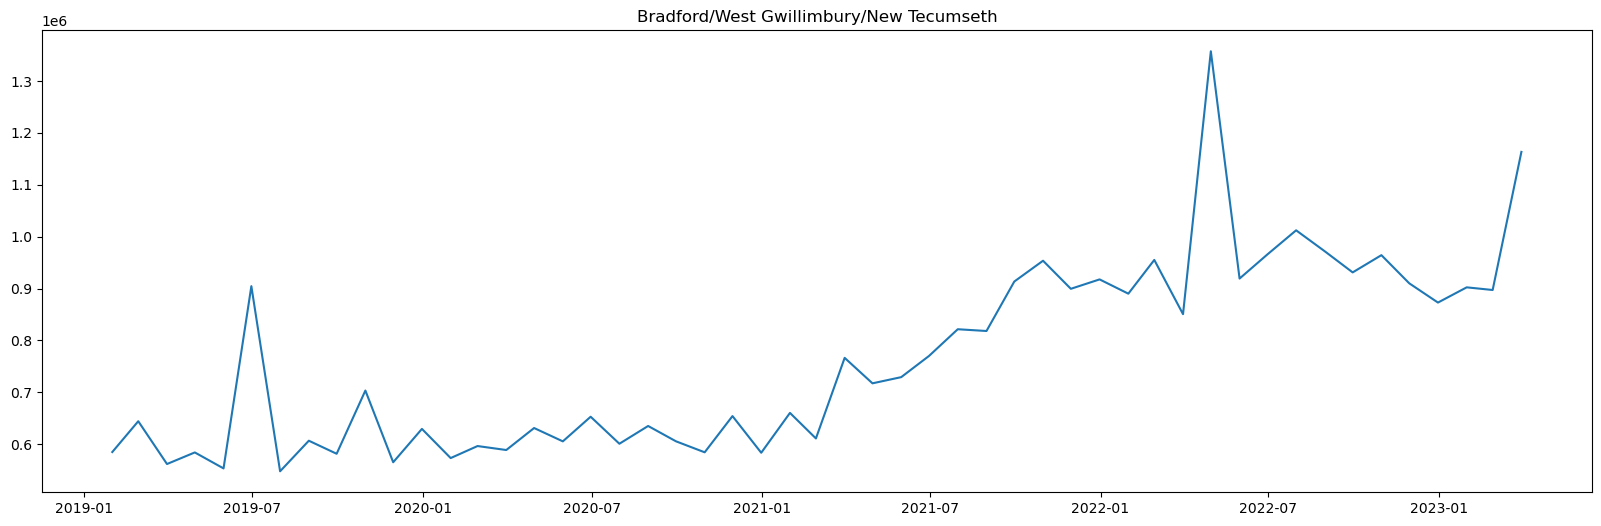

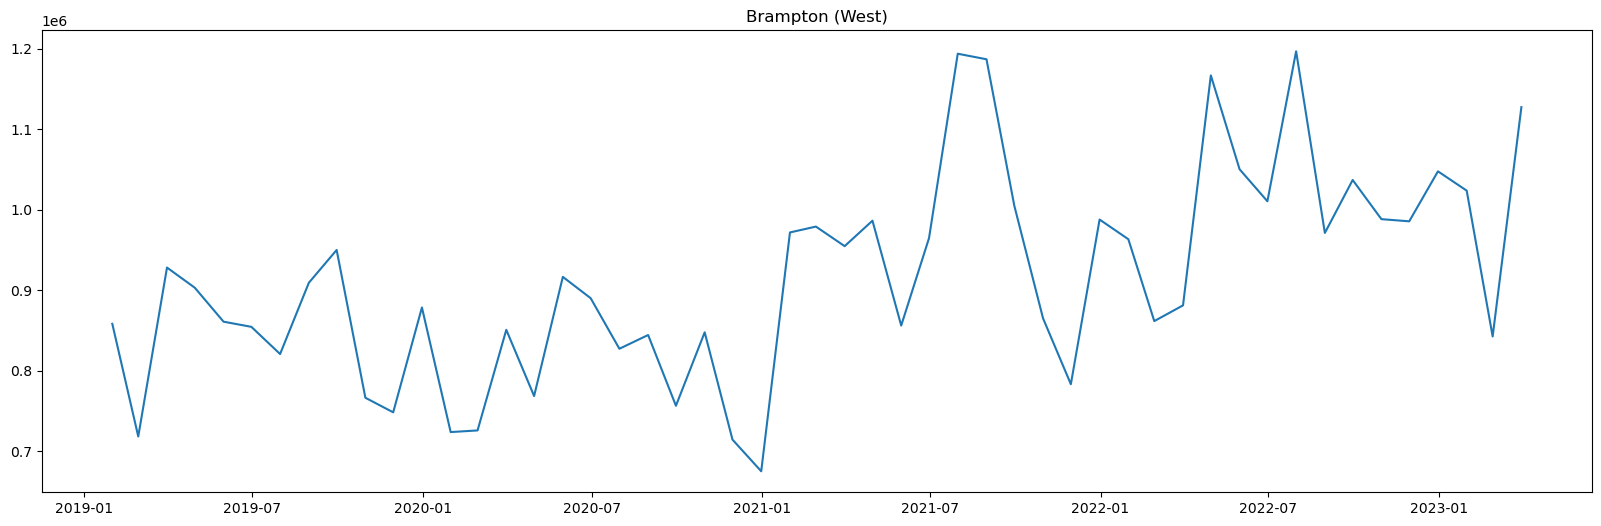

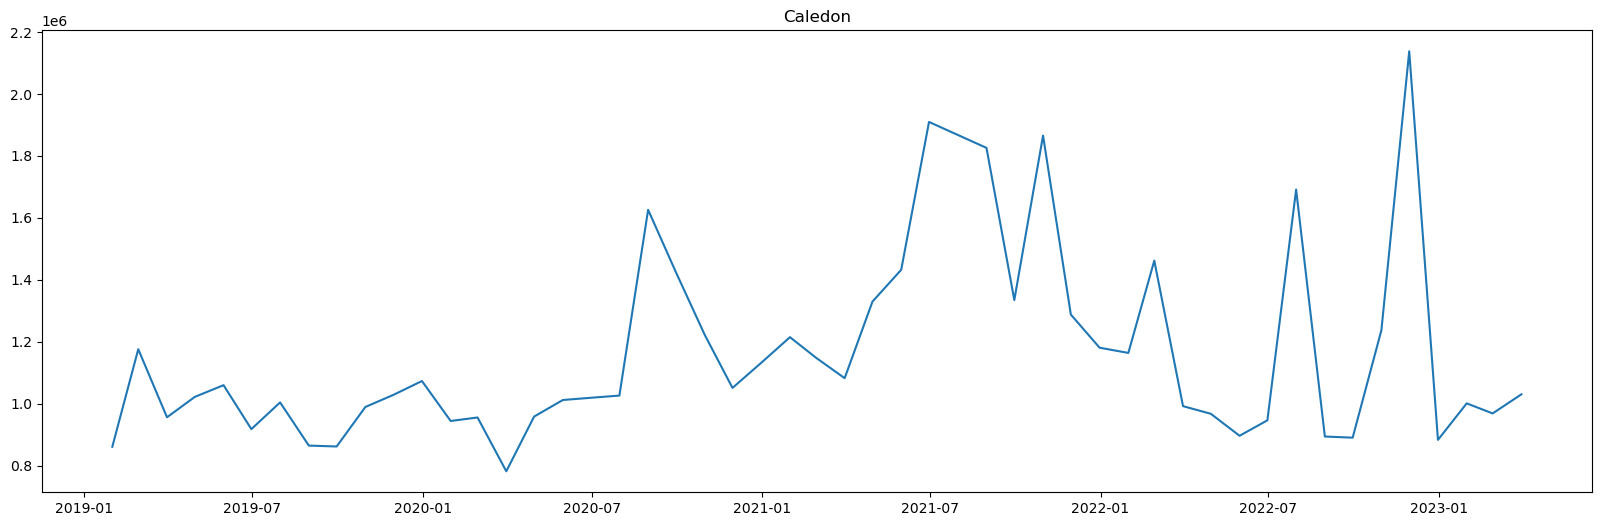

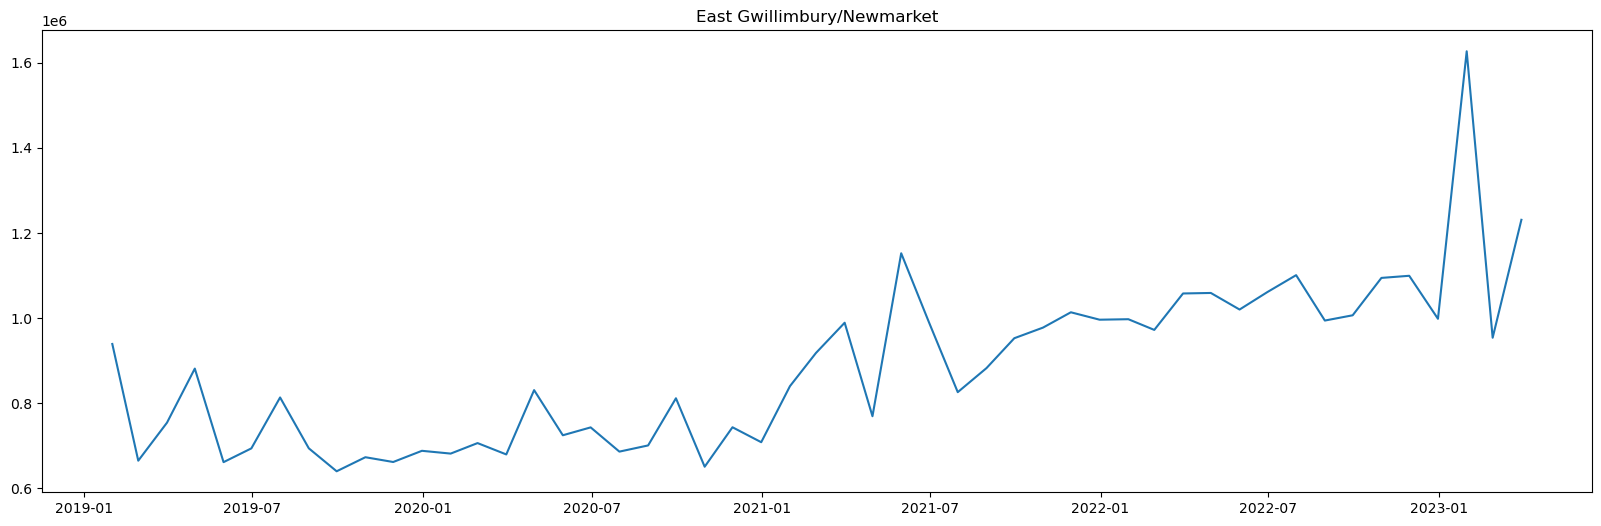

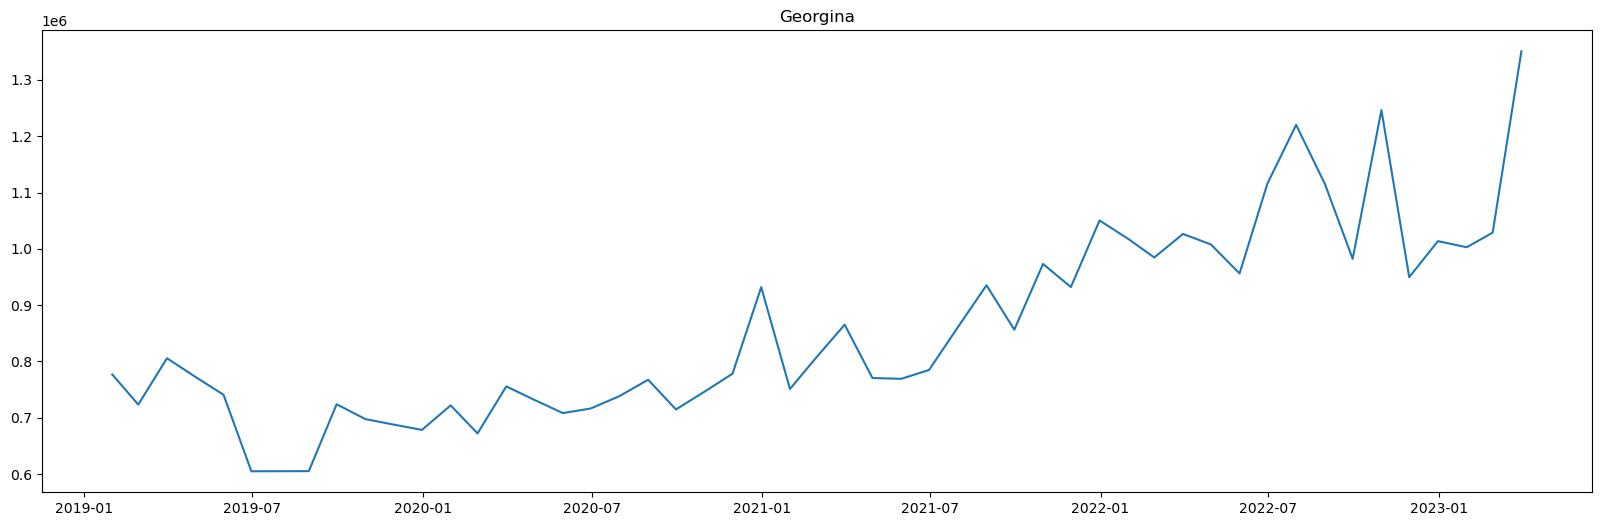

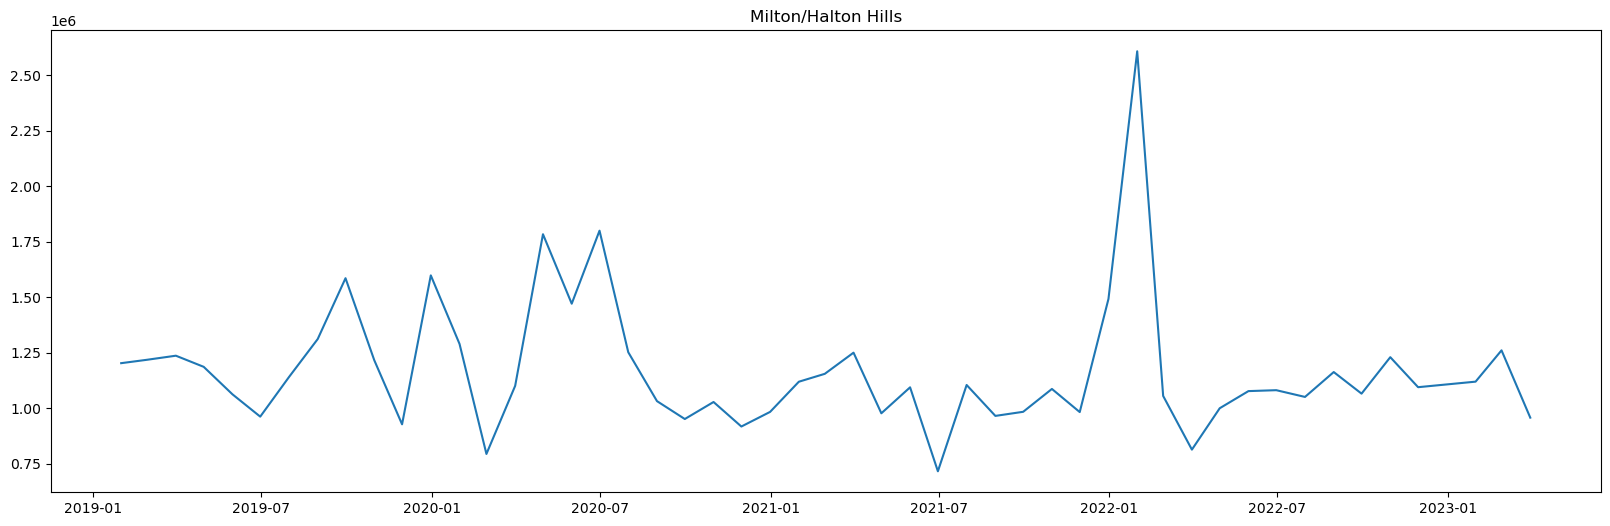

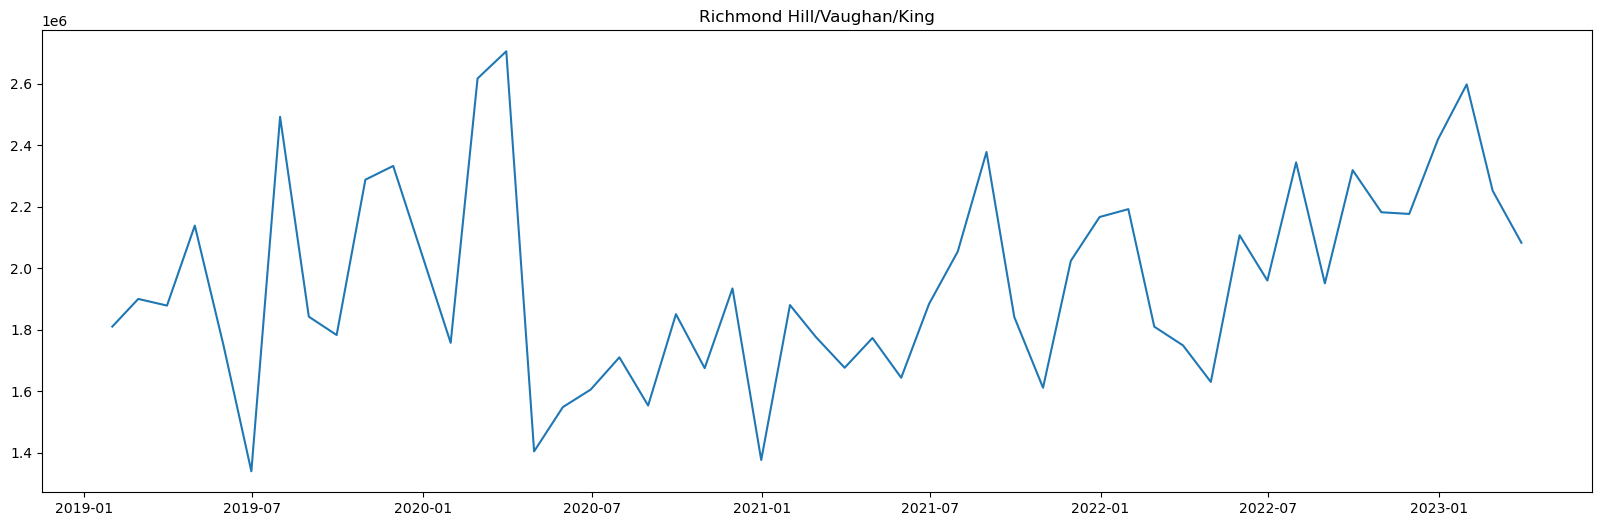

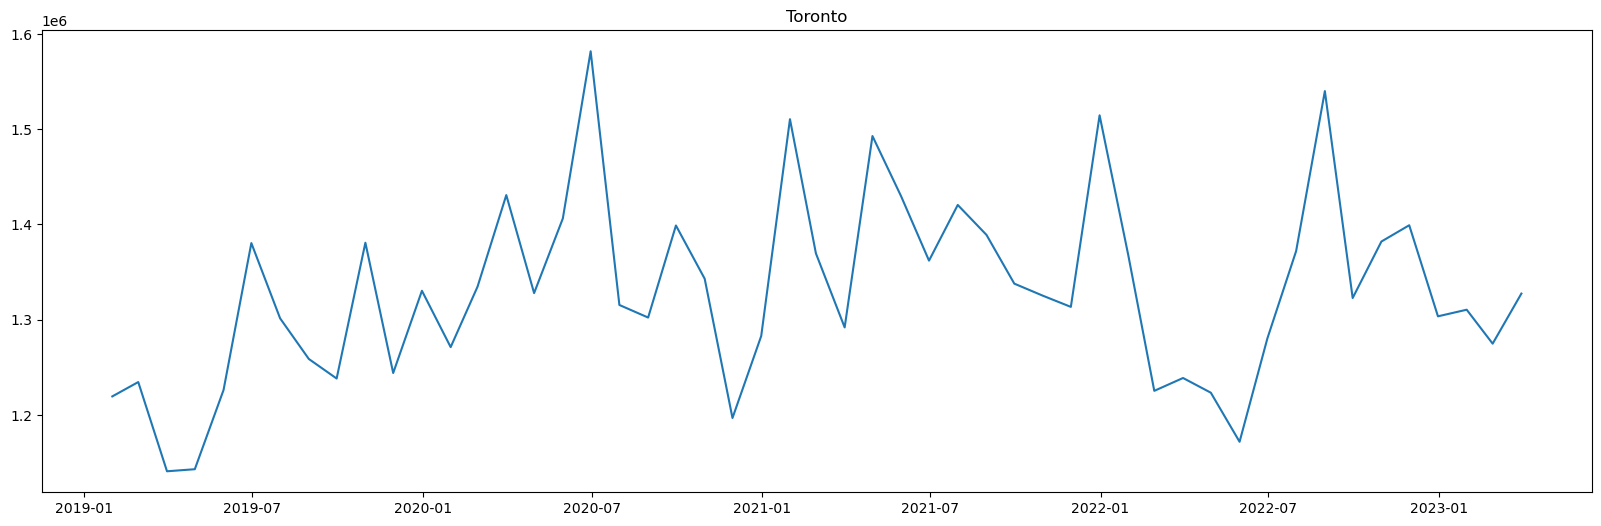

In [6]:
#Plot the time series
import matplotlib.pyplot as plt

for y in df:
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.plot (df.index,df[y])
    plt.title(y)

In [7]:
# ADF Test
neighborhood = []
for x in df:
    series = df[x].values
    result = adfuller(series, autolag='AIC')
    print(f'\n{x}')
    print(f'ADF Statistic: {result[0]}')
    print(f'n_lags: {result[1]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')


Bradford/West Gwillimbury/New Tecumseth
ADF Statistic: -0.6888485489948093
n_lags: 0.8496169089282939
p-value: 0.8496169089282939
Critial Values:
   1%, -3.5745892596209488
Critial Values:
   5%, -2.9239543084490744
Critial Values:
   10%, -2.6000391840277777

Brampton (West)
ADF Statistic: -3.830551177419627
n_lags: 0.0026097559510711104
p-value: 0.0026097559510711104
Critial Values:
   1%, -3.568485864
Critial Values:
   5%, -2.92135992
Critial Values:
   10%, -2.5986616

Caledon
ADF Statistic: -1.4326159171021942
n_lags: 0.5665436514141264
p-value: 0.5665436514141264
Critial Values:
   1%, -3.60098336718852
Critial Values:
   5%, -2.9351348158036012
Critial Values:
   10%, -2.6059629803688282

East Gwillimbury/Newmarket
ADF Statistic: 0.10090823712021046
n_lags: 0.9661230489628061
p-value: 0.9661230489628061
Critial Values:
   1%, -3.5745892596209488
Critial Values:
   5%, -2.9239543084490744
Critial Values:
   10%, -2.6000391840277777

Georgina
ADF Statistic: 0.423976187187008
n_l

In [8]:
# For the ADF test, the null hypothesis is that α=1 where α is coefficient of the first lag, i.e the time series is not stationary
# Since p-value is more than 0.05 and the ADF statistics is higher than the critical value, we cannot reject the null hypothesis
# The data is not stationary, we need to transform the data to perform SARIMA.

In [9]:
# Log Transforming the data
log_data = np.log(df)

# Differencing the data
df_diff = log_data.diff().dropna()

In [10]:
adfuller(df_diff['Milton/Halton Hills'], autolag='AIC')

(-4.669049600301454,
 9.617049112466426e-05,
 7,
 42,
 {'1%': -3.596635636000432,
  '5%': -2.933297331821618,
  '10%': -2.6049909750566895},
 8.707417417136469)

# ACF and PACF plots

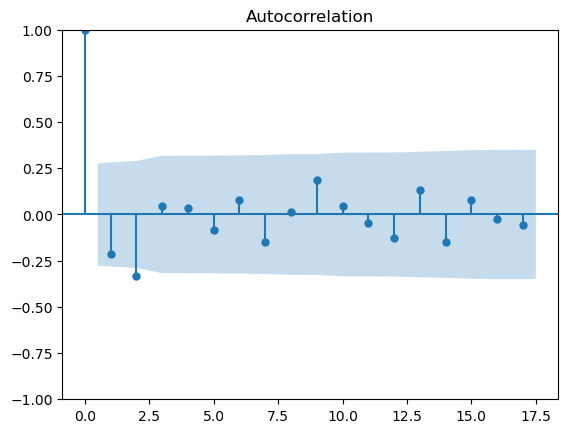

In [11]:
# Plot autocorrelation
plot_acf(df_diff['Milton/Halton Hills']);

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


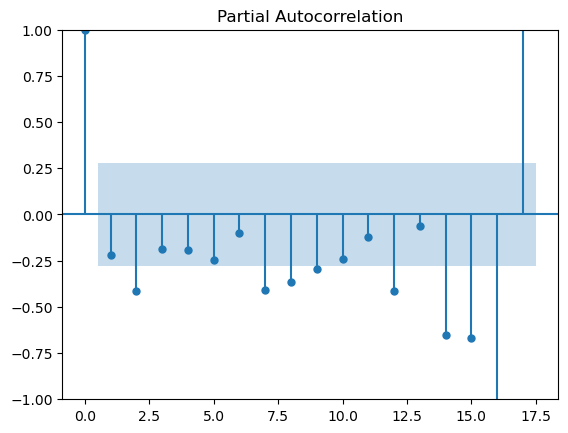

In [12]:
# Plot partial autocorrelation
plot_pacf(df_diff['Milton/Halton Hills']);

# ARIMA MODEL

In [13]:
# Generate the p,d,q values

from pmdarima.arima import auto_arima
model1 = auto_arima(df_diff['Milton/Halton Hills'], seasonal=False, suppress_warnings=True, error_action='ignore')
model1

ARIMA(order=(0, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [14]:
# Split into training and testing sets

train_data = df_diff['Milton/Halton Hills'][:-8]
test_data = df_diff['Milton/Halton Hills'][-8:]

In [15]:

#Fitting the data to the ARIMA model

model = sm.tsa.ARIMA(train_data, order=(1, 1, 3))
results = model.fit()

# Print the summary of the model
print(results.summary())

                                SARIMAX Results                                
Dep. Variable:     Milton/Halton Hills   No. Observations:                   42
Model:                  ARIMA(1, 1, 3)   Log Likelihood                  -3.486
Date:                 Sun, 21 May 2023   AIC                             16.972
Time:                         08:51:15   BIC                             25.540
Sample:                     02-28-2019   HQIC                            20.092
                          - 07-31-2022                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7919      0.320     -2.478      0.013      -1.418      -0.166
ma.L1         -0.9892    661.527     -0.001      0.999   -1297.559    1295.581
ma.L2         -0.9998    303.569     -0.003 

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


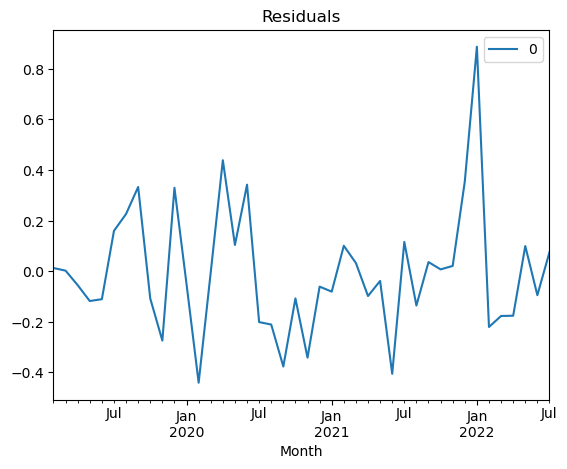

In [16]:
# Plot the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.title('Residuals')
plt.show()

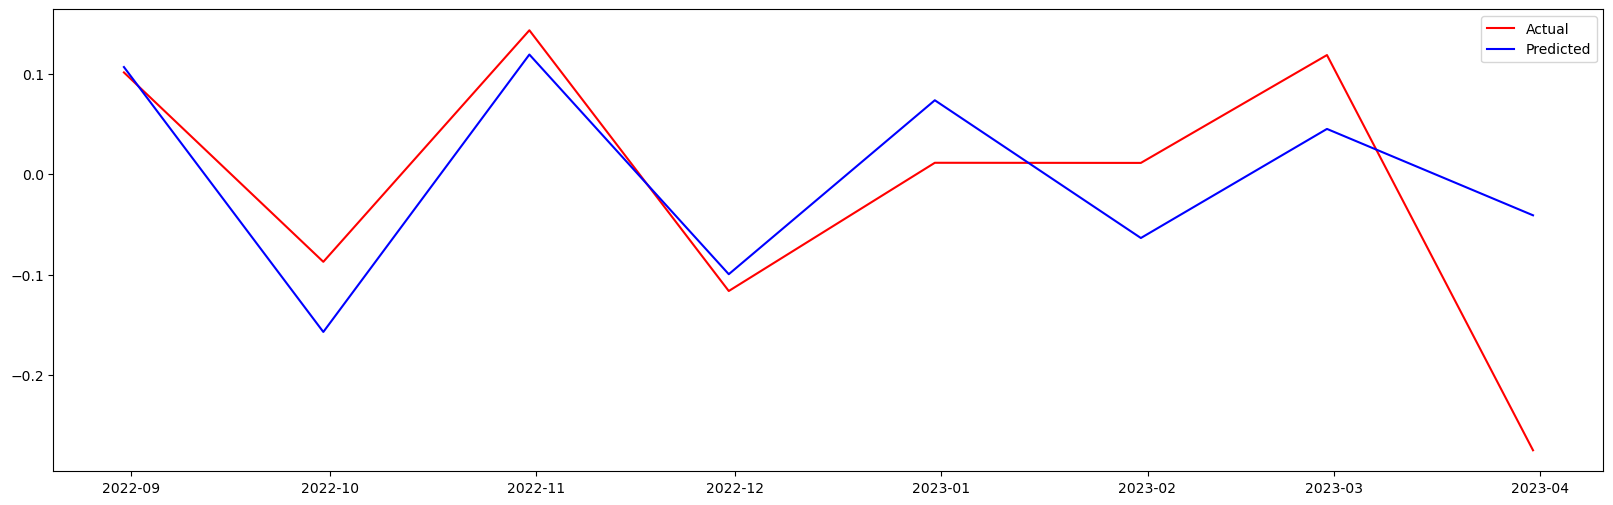

In [17]:
# Plot the actual vs predicted values
prediction =  results.forecast(steps = len(test_data))

# Plot Actual vs. Predicted
fig, ax = plt.subplots(figsize=(20, 6))
line1 = ax.plot(test_data.index,test_data,color = 'red', label = 'Actual')
line2 = ax.plot(prediction, color = 'blue', label = 'Predicted')
plt.legend()

In [18]:
# Reverse the differencing for predictions

# y_pred = np.zeros_like(prediction)
# y_pred[0] = prediction[0]
# for i in range(1, len(y_pred)):
#     y_pred[i] = y_pred[i-1] + test_data[i-1]

# # Reverse the differencing for test_data

# test_rev = np.zeros_like(prediction)
# test_rev[0] = test_data[0]
# for i in range(1, len(test_data)):
#     d = prediction.index[i-1]
#     print(df_diff.loc[d,'Bradford/West Gwillimbury/New Tecumseth'])
    

# #  test_rev[i] = test_rev[i-1] + df_diff.loc[d,'Bradford/West Gwillimbury/New Tecumseth']

In [19]:
prediction

2022-08-31    0.106618
2022-09-30   -0.157076
2022-10-31    0.119068
2022-11-30   -0.099601
2022-12-31    0.073555
2023-01-31   -0.063561
2023-02-28    0.045017
2023-03-31   -0.040963
Freq: M, Name: predicted_mean, dtype: float64

In [20]:
#Evaluation Criteria

rmse = np.sqrt(mean_squared_error((prediction), (test_data)))
mape = mean_absolute_percentage_error((prediction), (test_data))
mae = mean_absolute_error(prediction, test_data)

print(f'The mean absolute percentage error: {mape}')
print(f'The mean absolute error: {mae}')
print(f'The root mean square error: {rmse}')


The mean absolute percentage error: 1.2788932127623074
The mean absolute error: 0.07005947413164836
The root mean square error: 0.09704567355714576


# SARIMA MODEL

In [21]:
#Fitting the data to the SARIMA model

model = SARIMAX(train_data, order=(2, 1, 2), seasonal_order=(0, 1, 0, 12))
results1 = model.fit()

# Print model summary
print(results1.summary())

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                      SARIMAX Results                                      
Dep. Variable:                 Milton/Halton Hills   No. Observations:                   42
Model:             SARIMAX(2, 1, 2)x(0, 1, [], 12)   Log Likelihood                 -18.039
Date:                             Sun, 21 May 2023   AIC                             46.077
Time:                                     08:51:16   BIC                             52.914
Sample:                                 02-28-2019   HQIC                            48.218
                                      - 07-31-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1536      0.502     -2.297      0.022      -2.138      -0.169
ar.L2         -0.2245      

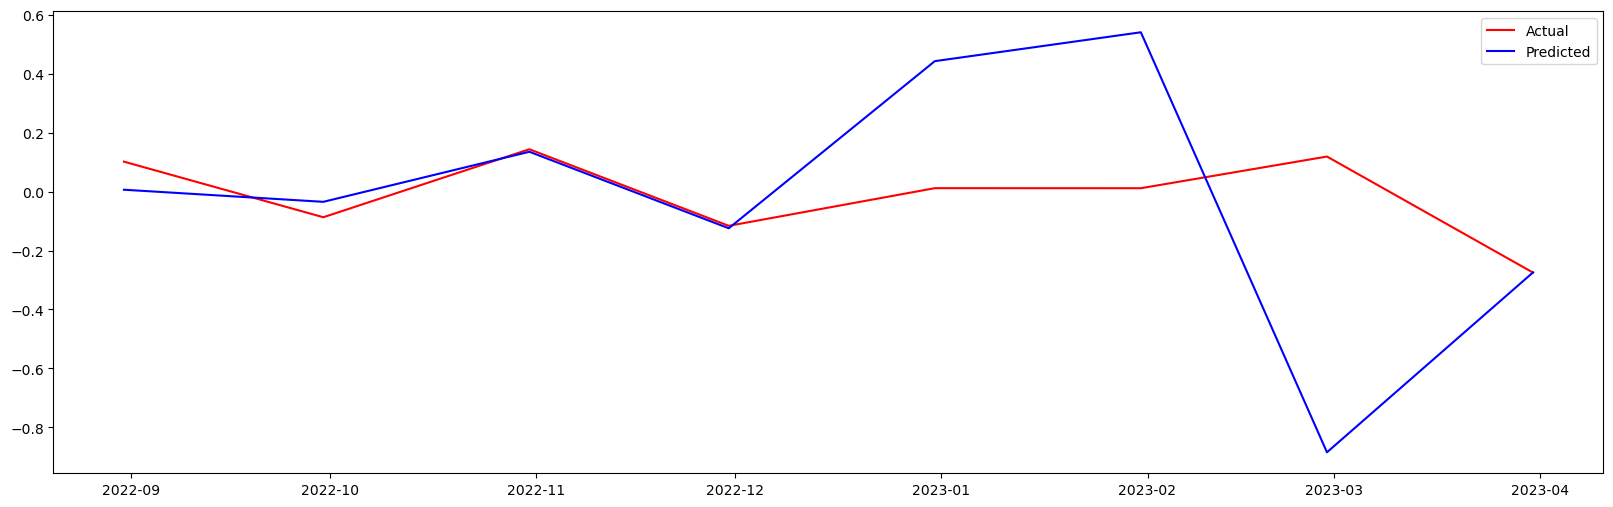

In [22]:
# Make predictions on test set

prediction1 = results1.forecast(steps = len(test_data))
prediction1

# Plot Actual vs. Predicted

fig, ax = plt.subplots(figsize=(20, 6))
line1 = ax.plot(test_data.index,test_data,color = 'red', label = 'Actual')
line2 = ax.plot(prediction1, color = 'blue', label = 'Predicted')
plt.legend()

In [23]:
#Evaluation Criteria

rmse1 = np.sqrt(mean_squared_error((prediction1), (test_data)))
mape1 = mean_absolute_percentage_error((prediction1), (test_data))
mae1 = mean_absolute_error(prediction1, test_data)

print(f'The mean absolute percentage error: {mape1}')
print(f'The mean absolute error: {mae1}')
print(f'The root mean square error: {rmse1}')


The mean absolute percentage error: 2.5551213996161493
The mean absolute error: 0.2658254606265085
The root mean square error: 0.4304159727724149


# RandomForrestRegressor

In [24]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
from skforecast.model_selection import grid_search_forecaster

In [25]:
# Hyperparameter Grid search
# ==============================================================================
steps = 36
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [5, 10, 15]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = train_data,
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_absolute_percentage_error',
                        initial_train_size = int(len(train_data)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 18.


loop lags_grid: 100%|███████████████████████████████████████| 3/3 [00:20<00:00,  6.79s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5] 
  Parameters: {'max_depth': 3, 'n_estimators': 500}
  Backtesting metric: 1.1229887248705677



In [26]:
# Grid Search results

results_grid

,lags,params,mean_absolute_percentage_error,max_depth,n_estimators
1,"[1, 2, 3, 4, 5]","{'max_depth': 3, 'n_estimators': 500}",1.122989,3,500
0,"[1, 2, 3, 4, 5]","{'max_depth': 3, 'n_estimators': 100}",1.295549,3,100
2,"[1, 2, 3, 4, 5]","{'max_depth': 5, 'n_estimators': 100}",1.341326,5,100
5,"[1, 2, 3, 4, 5]","{'max_depth': 10, 'n_estimators': 500}",1.372709,10,500
3,"[1, 2, 3, 4, 5]","{'max_depth': 5, 'n_estimators': 500}",1.405405,5,500
4,"[1, 2, 3, 4, 5]","{'max_depth': 10, 'n_estimators': 100}",1.466063,10,100
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 100}",1.487039,5,100
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",1.487832,10,100
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",1.517781,3,100
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",2.721110,3,500


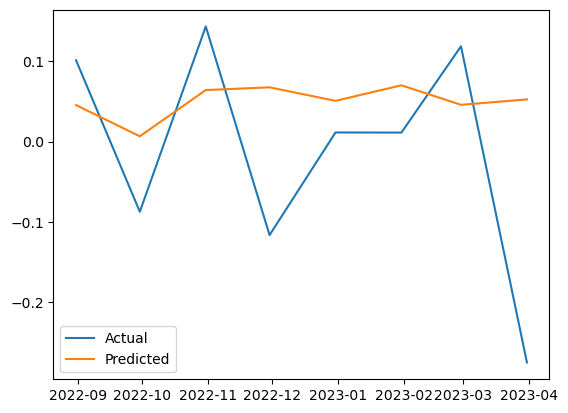

In [36]:
# Create and train forecaster with the best hyperparameters

regressor = RandomForestRegressor(max_depth=3, n_estimators=500, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 5
             )

forecaster.fit(y=train_data)

# Predict on the testing data
predictions = forecaster.predict(steps=8)
predictions.index = test_data.index
predictions.index

# Plot the actual vs predicted values
plt.plot(test_data, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

In [37]:
#Evaluation Criteria

rmse2 = np.sqrt(mean_squared_error((predictions), (test_data)))
mape2 = mean_absolute_percentage_error((predictions), (test_data))
mae2 = mean_absolute_error(predictions, test_data)

print(f'The mean absolute percentage error: {mape2}')
print(f'The mean absolute error: {mae2}')
print(f'The root mean square error: {rmse2}')


The mean absolute percentage error: 3.6131730378402924
The mean absolute error: 0.11386335848382217
The root mean square error: 0.14552686928659203


# XGBoost Regressor

In [29]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [30]:
# Create the model

model = xgb.XGBRegressor()

In [31]:
# Split into training and testing sets
df1 = pd.DataFrame (index = df.index)
df1['Day']=df.index.day
df1['Month']=df.index.month
df1['Year']=df.index.year

y = df['Milton/Halton Hills'].values

X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.16, random_state=42)

In [32]:
# Train the model

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [40]:
len(y_test)

9

In [34]:
# Evaluate the model on the test set

y_pred = model.predict(X_test)


In [41]:
#Evaluation Criteria

rmse3 = np.sqrt(mean_squared_error((y_pred), (y_test)))
mape3 = mean_absolute_percentage_error((y_pred), (y_test))
mae3 = mean_absolute_error(y_pred, y_test)

print(f'The mean absolute percentage error: {mape3}')
print(f'The mean absolute error: {mae3}')
print(f'The root mean square error: {rmse3}')


The mean absolute percentage error: 0.21738003036827325
The mean absolute error: 335490.375
The root mean square error: 583416.4515733464


In [59]:
# Generate future dates for forecasting
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=12, freq='M')

# Create a dataframe with the future dates as the index
future_df = pd.DataFrame(index=future_dates)

# Make predictions for the future dates
X_future [ 'Day'] = future_df.index.day
X_future['Month'] = future_df.index.month
X_future['Year'] = future_df.index.year

y_future = model.predict(X_future)

prediction =pd.DataFrame(y_future)
prediction.set_index(X_future.index, inplace = True)

In [60]:
prediction

,0
2023-03-31,9.580859e+05
2023-04-30,1.055609e+06
2023-05-31,9.770844e+05
2023-06-30,1.061820e+06
2023-07-31,1.044996e+06
2023-08-31,1.071380e+06
2023-09-30,1.064481e+06
2023-10-31,1.200415e+06
2023-11-30,1.068158e+06
2023-12-31,1.107847e+06


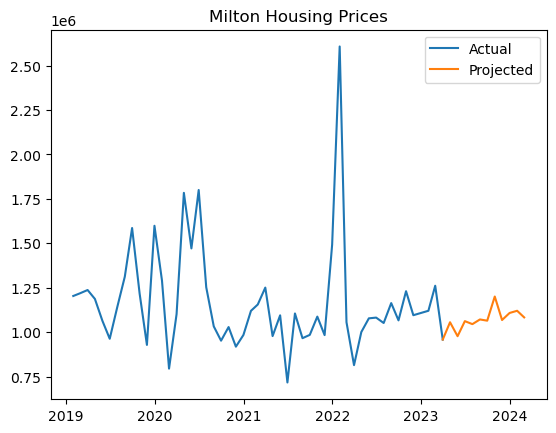

In [62]:

# Plot the actual vs projected values values
plt.plot(df['Milton/Halton Hills'], label='Actual')
plt.plot(prediction, label='Projected')
plt.legend()
plt.title('Milton Housing Prices')
plt.show()